# Importing Libraries

In [ ]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' %x)

# Data PreProcessing

## Loading Dataset

Link to dataset: https://drive.google.com/file/d/1tz01we33qkWRkR8g1HYE5l2sCp276byW/view?usp=sharing

In [ ]:
df = pd.read_csv('mwommykwos_final.csv')
df

,Nama,Location,wifi,AC,Kasur,km_dalam,Duduk,akses_24,listrik,price,medi_in
0,Kost Adem Tipe ADukuh Pakis Surabaya,Dukuh Pakis,0,0,1,0,1,0,0,500000,0
1,Kost Apik DK 20 Tipe ADukuh Pakis Surabaya,Dukuh Pakis,1,1,1,1,1,1,0,1897920,1
2,Kost Apik DK 20 Tipe BDukuh Pakis Surabaya,Dukuh Pakis,1,1,1,0,1,1,0,1656000,1
3,Kost Apik DK 20 Tipe CDukuh Pakis Surabaya,Dukuh Pakis,1,0,1,1,0,1,0,914850,0
4,Kost Arah ExecutiveDukuh Pakis Surabaya,Dukuh Pakis,1,1,1,1,1,1,0,2100000,1
...,...,...,...,...,...,...,...,...,...,...,...
752,Kost Ungu Tipe AWonokromo Surabaya,Wonokromo,0,0,1,1,1,1,0,600000,0
753,Kost Yani 1Wonokromo Surabaya,Wonokromo,0,1,1,0,0,1,0,700000,0
754,Kost Zahrifah Tipe AWonokromo Surabaya,Wonokromo,1,0,1,0,0,1,1,700000,0
755,Kost BAA Wonokromo Surabaya,Wonokromo,0,0,1,0,0,1,0,500000,0


## Understanding the Data

The data utilized for this project originates from scraping rental housing information in Surabaya from the Mamikos website using BeautifulSoup. The dataset encompasses eleven variables.

Attribute Information:

1. Nama: Name of the rented room
2. Location: Location of the room in terms of its district
3. Facilities in the room:
   * Wifi: Presence of WiFi facility in the room, 1= Yes, 0= No
   * AC: Presence of air conditioning facility in the room, 1= Yes, 0= No
   * Kasur: Presence of bed facility in the room, 1= Yes, 0= No
   * km_dalam: Presence of indoor bathroom facility in the room, 1= Yes, 0= No
   * Duduk: Presence of toilet with a seat in the room, 1= Yes, 0= No
   * Akses_24: Whether there is a 24-hour access rule, 1= Yes, 0= No
   * listrik: Whether the price includes electricity costs, 1= Yes, 0= No
4. price: Monthly rent in Indonesian Rupiah
5. medi_in: Is the price above the median value (1,000,000), 1= Yes, 0= No




In this classification analysis, our goal is to anticipate whether a property's price exceeds or falls below the median, utilizing location and amenities variables as key predictors.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Nama      757 non-null    object
 1   Location  757 non-null    object
 2   wifi      757 non-null    int64 
 3   AC        757 non-null    int64 
 4   Kasur     757 non-null    int64 
 5   km_dalam  757 non-null    int64 
 6   Duduk     757 non-null    int64 
 7   akses_24  757 non-null    int64 
 8   listrik   757 non-null    int64 
 9   price     757 non-null    int64 
 10  medi_in   757 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 65.2+ KB


In [ ]:
df.describe()

,wifi,AC,Kasur,km_dalam,Duduk,akses_24,listrik,price,medi_in
count,757.00000,757.00000,757.00000,757.00000,757.00000,757.00000,757.00000,757.00000,757.00000
mean,0.74373,0.48613,0.89432,0.45839,0.59445,0.64201,0.09643,1170647.85865,0.61559
std,0.43686,0.50014,0.30763,0.49859,0.49132,0.47973,0.29538,666815.19457,0.48678
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,200000.00000,0.00000
25%,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,700000.00000,0.00000
50%,1.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,1000000.00000,1.00000
75%,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,1500000.00000,1.00000
max,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,10000000.00000,1.00000



Based on the table above, there is a boarding house with an exceptionally high price, namely IDR 10,000,000.00 per month. Upon investigation, this boarding house is located near the Sepuluh Nopember Institute of Technology (ITS) with facilities that are less complete compared to others. Based on these considerations, we have decided to remove that data.

## Data Cleaning

In [ ]:
df_drop=df[df["price"]==10000000].index
df.drop(df_drop,inplace=True)

In [ ]:
df.isnull().sum()

Nama        0
Location    0
wifi        0
AC          0
Kasur       0
km_dalam    0
Duduk       0
akses_24    0
listrik     0
price       0
medi_in     0
dtype: int64

The dataset used does not have any missing values (NA)

In [ ]:
plt.boxplot(df.price)
plt.title("Boxplot Variable price")

There are a few boarding house prices that stand out as outliers compared to others. We have chosen not to remove or alter these values.

In [ ]:
df=df.drop('price',axis=1)
df=df.drop('Nama',axis=1)

The price and name variables have been removed from the data as they are not needed for the classification process.

# Data Vizualization

## Attribute Analysis

Text(0.5, 1.0, 'Distribusi Median Harga')

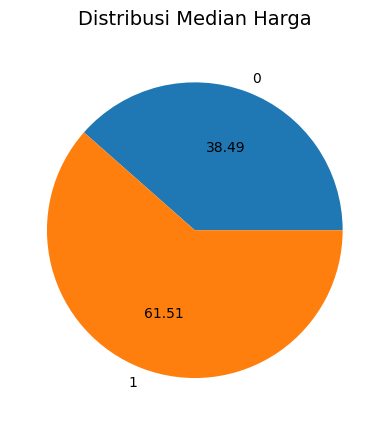

In [ ]:
df.groupby('medi_in').size().plot(kind='pie', autopct='%.2f')
plt.title(
    label = "Distribusi Median Harga",
    fontdict = {"fontsize":14},
    pad = 15
)

The class distribution in the dataset is well-balanced, enabling the application of k-fold cross-validation for effective data partitioning.

Text(0.5, 1.0, 'Distribusi Kost Berdasarkan Lokasi')

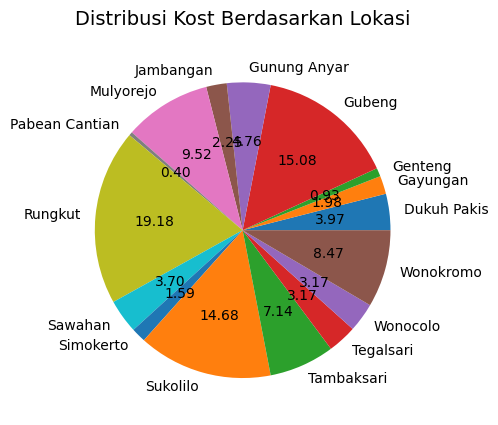

In [ ]:
df.groupby('Location').size().plot(kind='pie', autopct='%.2f')
plt.title(
    label = "Distribusi Kost Berdasarkan Lokasi",
    fontdict = {"fontsize":14},
    pad = 15
)

The visual representation above reveals that 'Rungkut' boasts the highest concentration of boarding houses, with a substantial figure of (19.18), while 'Pabean Cantian' stands at the opposite end with the smallest count of just (0.40).

<Axes: xlabel='Location', ylabel='count'>

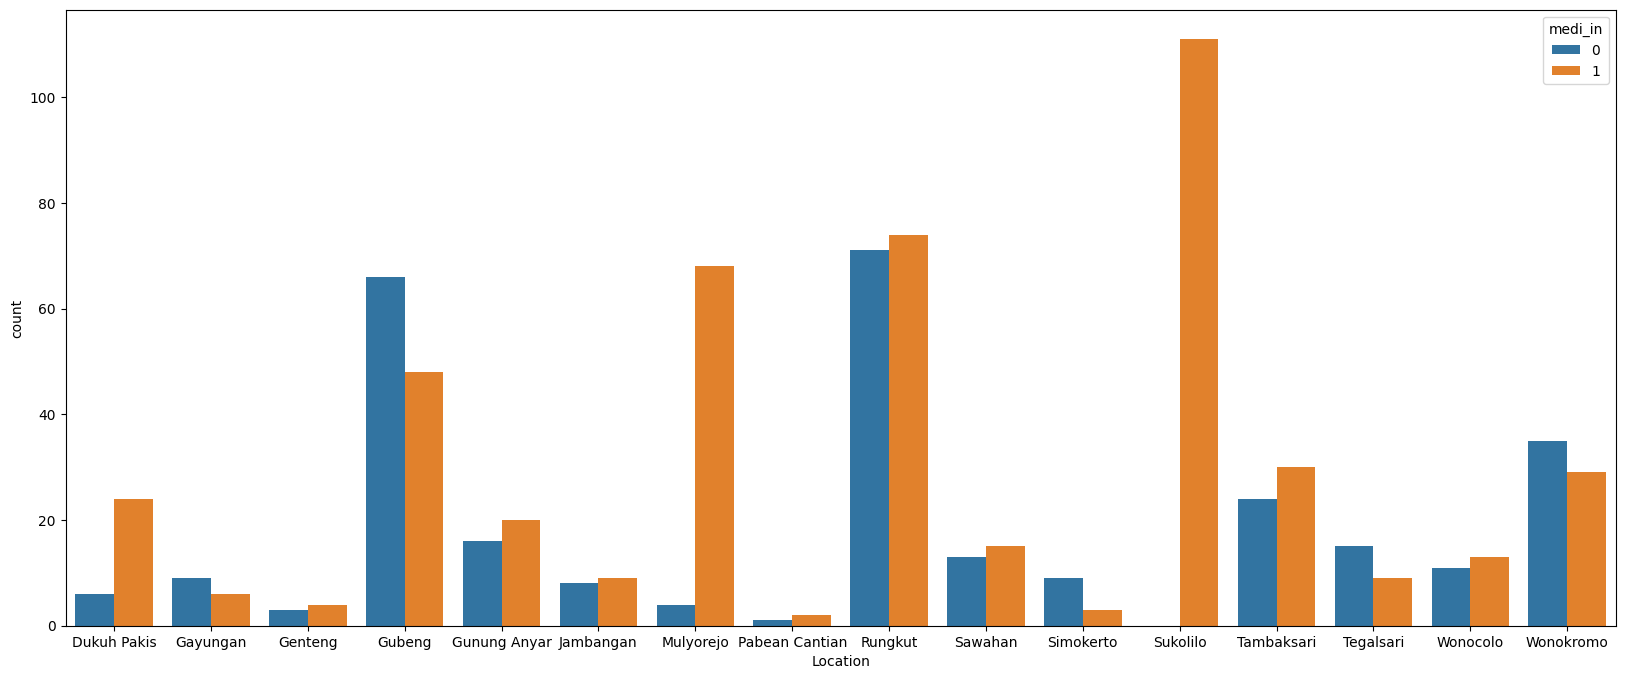

In [ ]:
fig=plt.figure(figsize=(20,8))
sns.countplot(data=df,x="Location",hue="medi_in")

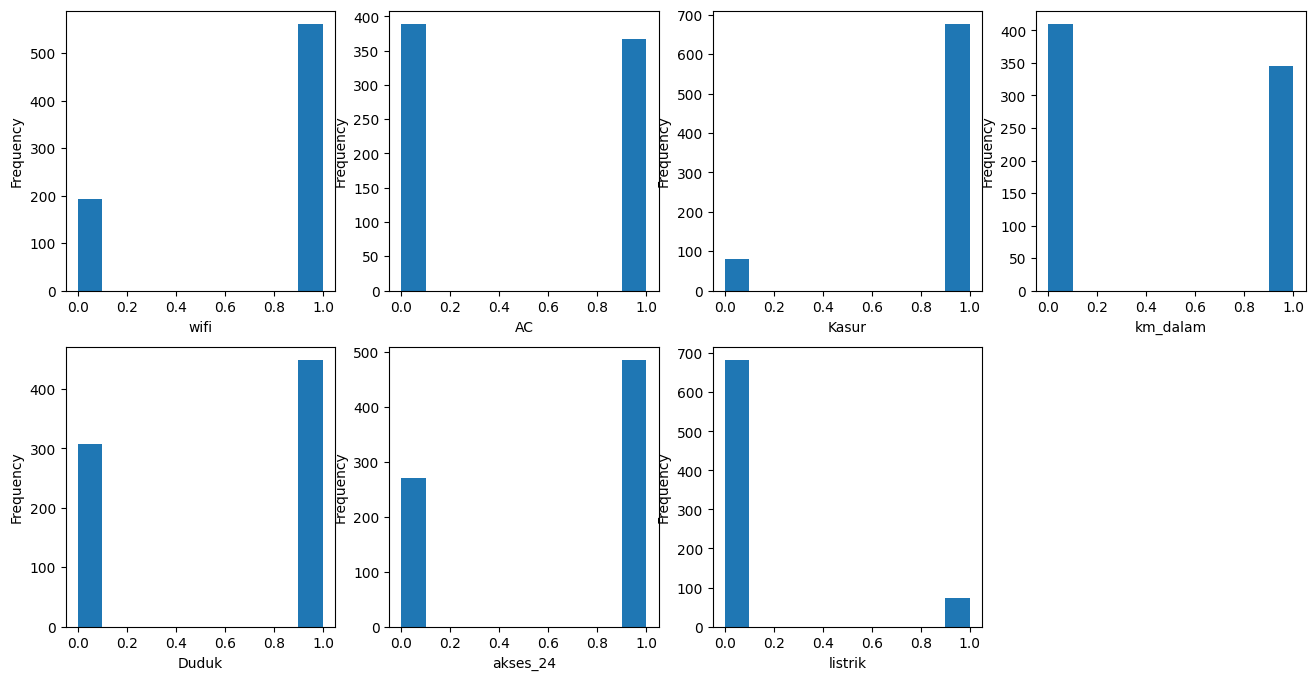

In [ ]:
cat_list=["wifi","AC","Kasur","km_dalam","Duduk","akses_24","listrik"]
fig=plt.figure(figsize=(16,8))
for i in range(len(cat_list)):
  column=cat_list[i]
  sub=fig.add_subplot(2,4,i+1)
  sub.set_xlabel(column)
  df[column].plot.hist()

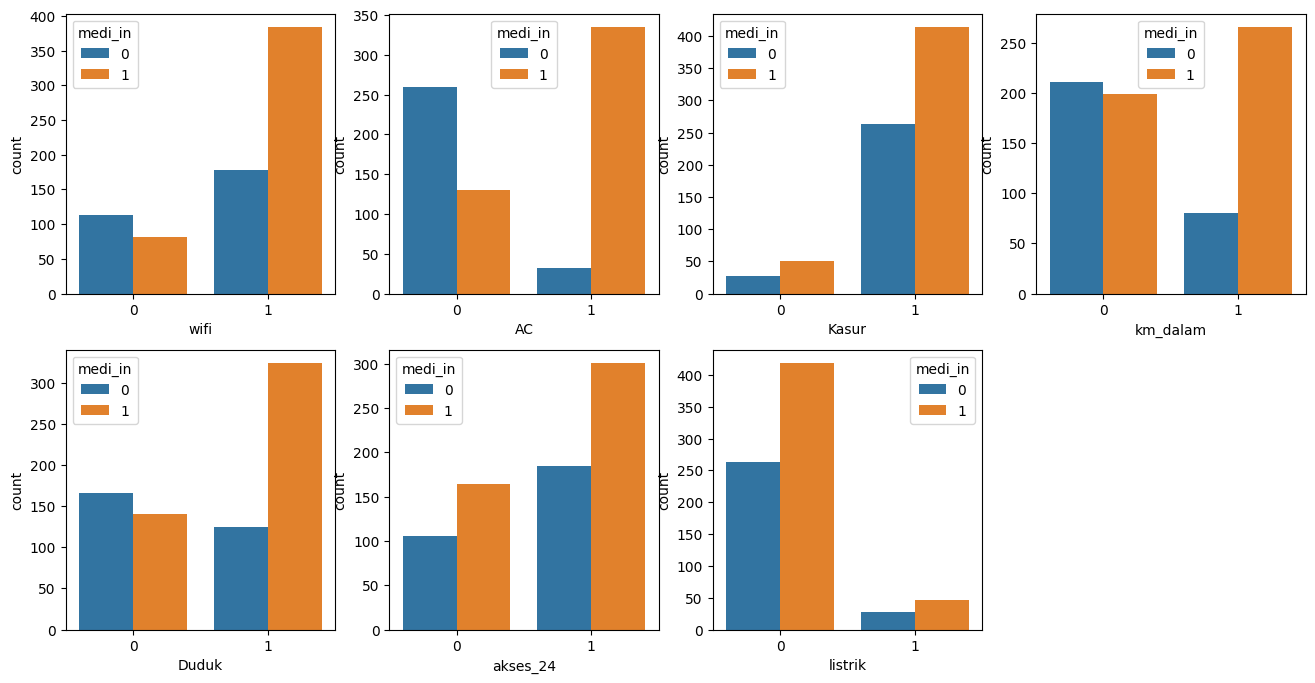

In [ ]:
cat_list=["wifi","AC","Kasur","km_dalam","Duduk","akses_24","listrik"]
fig=plt.figure(figsize=(16,8))
for i in range(len(cat_list)):
  column=cat_list[i]
  sub=fig.add_subplot(2,4,i+1)
  chart=sns.countplot(data=df,x=column,hue="medi_in")

## Correlation

<ipython-input-16-f98f2af8dbee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(df.corr(), cmap="rocket_r", annot=True)


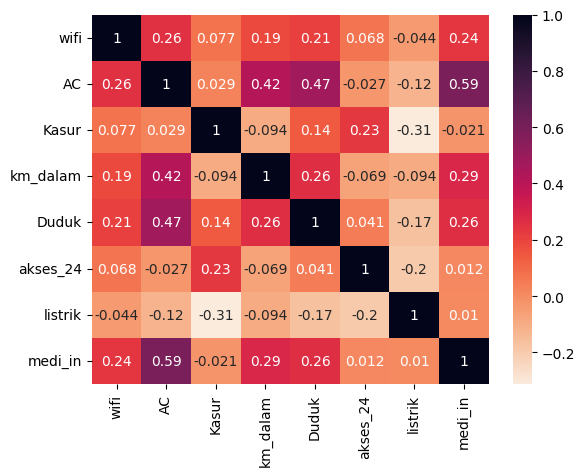

In [ ]:
dataplot = sb.heatmap(df.corr(), cmap="rocket_r", annot=True)
plt.show()

Based on the heatmap visualization above, it can be seen that the target variable "medi_in" has a strong correlation with the variable AC. In addition, the target variable "medi_in" also has a weak positive correlation with the variables "wifi," "km_dalam," and "Duduk."

# Data Transformation

We employ One Hot Encoding to convert the 'location' variable data into binary variables (1 or 0). This method is chosen specifically for 'location' variable, as they are of a nominal categorical nature.

In [ ]:
df=df.reset_index(drop=True)

In [ ]:
print(np.unique(df.Location.values))

['Dukuh Pakis' 'Gayungan' 'Genteng' 'Gubeng' 'Gunung Anyar' 'Jambangan'
 'Mulyorejo' 'Pabean Cantian' 'Rungkut' 'Sawahan' 'Simokerto' 'Sukolilo'
 'Tambaksari' 'Tegalsari' 'Wonocolo' 'Wonokromo']


In [ ]:
oh = preprocessing.OneHotEncoder()
ex = oh.fit_transform(df.Location.values.reshape(-1,1)).toarray()

new_col=[]
for i in range(len(df.columns)):
  word="kec_"+str(df.columns[i])
  new_col.append(word)
print(new_col)

dfOneHot = pd.DataFrame(ex, columns = np.unique(df.Location.values))
df = pd.concat([dfOneHot,df], axis=1)
df= df.drop(['Location'], axis=1)
df

['kec_Location', 'kec_wifi', 'kec_AC', 'kec_Kasur', 'kec_km_dalam', 'kec_Duduk', 'kec_akses_24', 'kec_listrik', 'kec_medi_in']


,Dukuh Pakis,Gayungan,Genteng,Gubeng,Gunung Anyar,Jambangan,Mulyorejo,Pabean Cantian,Rungkut,Sawahan,...,Wonocolo,Wonokromo,wifi,AC,Kasur,km_dalam,Duduk,akses_24,listrik,medi_in
0,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0,0,1,0,1,0,0,0
1,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,1,1,1,1,1,1,0,1
2,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,1,1,1,0,1,1,0,1
3,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,1,0,1,1,0,1,0,0
4,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,0,0,1,1,1,1,0,0
752,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,0,1,1,0,0,1,0,0
753,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,1,0,1,0,0,1,1,0
754,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,0,0,1,0,0,1,0,0


# ML Models with Cross Validation Partitioning


In [ ]:
from sklearn.metrics import auc,RocCurveDisplay,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.model_selection import KFold

In [ ]:
x=df.drop('medi_in',axis=1)
y=df.medi_in

In [ ]:
print(x.shape)
print(y.shape)

(756, 23)
(756,)


In [ ]:
k = 10
kf = KFold(n_splits=k)

## Suppor Vector Machine (SVM)

,Metrics,Score
0,Accuracy,0.89830
1,Precision,0.91581
2,Recall,0.90623
3,F1-Score,0.90919


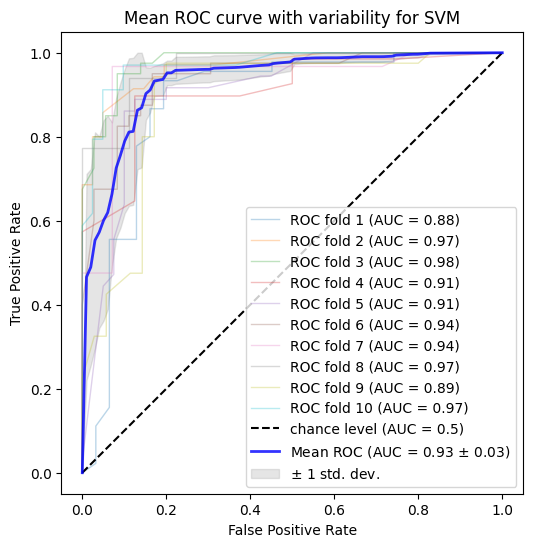

In [ ]:
from sklearn.svm import SVC

fig1, ax1 = plt.subplots(figsize=(14,6))

accuracy_list=[]
precision_list=[]
recall_list=[]
f1_score_list=[]

tprs, aucs = [], []
mean_fpr1 = np.linspace(0, 1, 100)

classifier = SVC(random_state=97,probability=True)

predicted_targets = np.array([])
actual_targets = np.array([])

i=0

for train_index , test_index in kf.split(x):
  i+=1
  x_train , x_test = x.iloc[train_index,:],x.iloc[test_index,:]
  y_train , y_test = y[train_index] , y[test_index]

  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x_test)
  y_pred_proba = classifier.predict_proba(x_test)

  plot = RocCurveDisplay.from_estimator(
      classifier, x_test, y_test,
      name=f"ROC fold {i}",
      lw=1,
      ax=ax1,
      alpha=0.3
  )
  interp_tpr = np.interp(mean_fpr1, plot.fpr, plot.tpr)
  interp_tpr[0] = 0.0
  tprs.append(interp_tpr)
  aucs.append(plot.roc_auc)

  predicted_targets = np.append(predicted_targets, y_pred)
  actual_targets = np.append(actual_targets, y_test)

  accuracy_list.append(accuracy_score(y_test,y_pred))
  precision_list.append(precision_score(y_test,y_pred))
  recall_list.append(recall_score(y_test,y_pred))
  f1_score_list.append(f1_score(y_test,y_pred))

avg_f1_score = sum(f1_score_list)/k

ax1.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr1 = np.mean(tprs, axis=0)
mean_tpr1[-1] = 1.0
mean_auc1 = auc(mean_fpr1, mean_tpr1)
std_auc1 = np.std(aucs)
ax1.plot(
    mean_fpr1,
    mean_tpr1,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc1, std_auc1),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr1 + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr1 - std_tpr, 0)
ax1.fill_between(
    mean_fpr1,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax1.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Mean ROC curve with variability for SVM",
)
ax1.axis("square")
ax1.legend(loc="lower right")
fig1.show()

report_svm=pd.DataFrame({"Metrics":["Accuracy","Precision","Recall","F1-Score"],
            "Score":[(sum(accuracy_list))/k,(sum(precision_list))/k,
                     (sum(recall_list))/k,(sum(f1_score_list))/k]
            })
report_svm

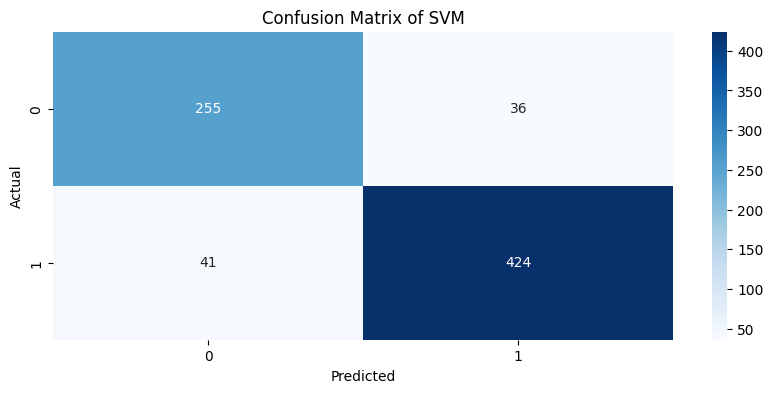

In [ ]:
matrix = confusion_matrix(actual_targets, predicted_targets)

plt.figure(figsize=(10,4))
sns.heatmap(matrix, annot=True, xticklabels=["0","1"], yticklabels=["0","1"], cmap="Blues", fmt="g")
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix of SVM')

plt.show()

## Random Forest

,Metrics,Score
0,Accuracy,0.90482
1,Precision,0.90688
2,Recall,0.92117
3,F1-Score,0.91349


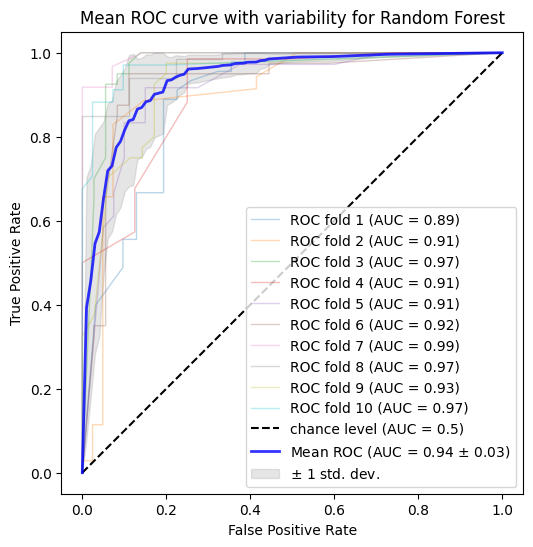

In [ ]:
from sklearn.ensemble import RandomForestClassifier

fig2, ax2 = plt.subplots(figsize=(14,6))

accuracy_list=[]
precision_list=[]
recall_list=[]
f1_score_list=[]

tprs, aucs = [], []
mean_fpr2 = np.linspace(0, 1, 100)

classifier = RandomForestClassifier(max_features=None,random_state=97,criterion="log_loss")

predicted_targets = np.array([])
actual_targets = np.array([])

i=0

for train_index , test_index in kf.split(x):
  i+=1
  x_train , x_test = x.iloc[train_index,:],x.iloc[test_index,:]
  y_train , y_test = y[train_index] , y[test_index]

  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x_test)
  y_pred_proba = classifier.predict_proba(x_test)

  plot = RocCurveDisplay.from_estimator(
      classifier, x_test, y_test,
      name=f"ROC fold {i}",
      lw=1,
      ax=ax2,
      alpha=0.3
  )
  interp_tpr = np.interp(mean_fpr2, plot.fpr, plot.tpr)
  interp_tpr[0] = 0.0
  tprs.append(interp_tpr)
  aucs.append(plot.roc_auc)

  predicted_targets = np.append(predicted_targets, y_pred)
  actual_targets = np.append(actual_targets, y_test)

  accuracy_list.append(accuracy_score(y_test,y_pred))
  precision_list.append(precision_score(y_test,y_pred))
  recall_list.append(recall_score(y_test,y_pred))
  f1_score_list.append(f1_score(y_test,y_pred))

ax2.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr2 = np.mean(tprs, axis=0)
mean_tpr2[-1] = 1.0
mean_auc2 = auc(mean_fpr2, mean_tpr2)
std_auc2 = np.std(aucs)
ax2.plot(
    mean_fpr2,
    mean_tpr2,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc2, std_auc2),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr2 + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr2 - std_tpr, 0)
ax2.fill_between(
    mean_fpr2,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax2.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Mean ROC curve with variability for Random Forest",
)
ax2.axis("square")
ax2.legend(loc="lower right")
fig2.show()

report_rf=pd.DataFrame({"Metrics":["Accuracy","Precision","Recall","F1-Score"],
            "Score":[(sum(accuracy_list))/k,(sum(precision_list))/k,
                     (sum(recall_list))/k,(sum(f1_score_list))/k]
            })
report_rf

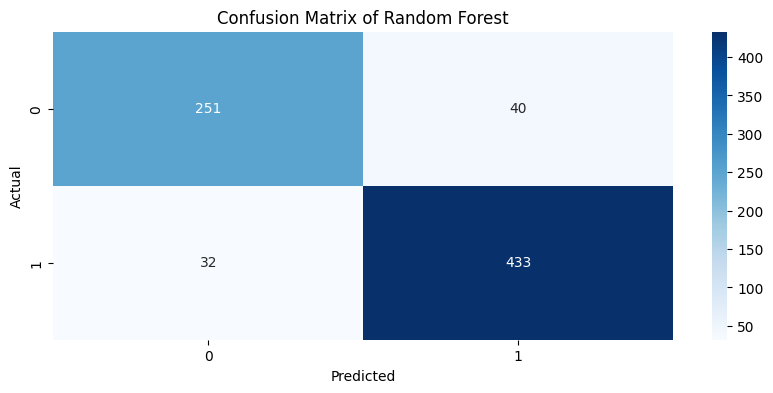

In [ ]:
matrix = confusion_matrix(actual_targets, predicted_targets)

plt.figure(figsize=(10,4))
sns.heatmap(matrix, annot=True, xticklabels=["0","1"], yticklabels=["0","1"], cmap="Blues", fmt="g")
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix of Random Forest')

plt.show()

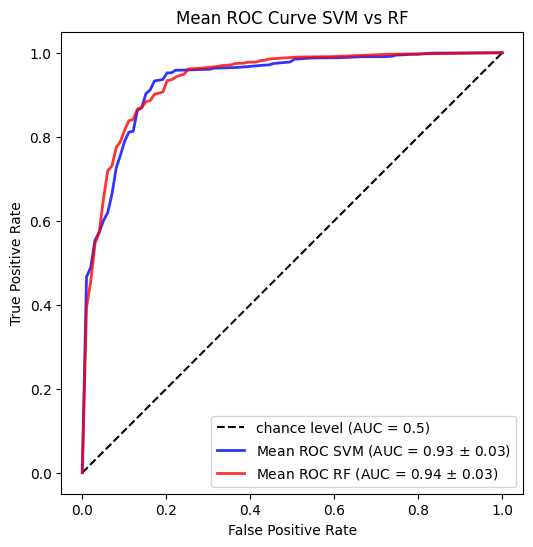

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
ax.plot(
    mean_fpr1,
    mean_tpr1,
    color="b",
    label=r"Mean ROC SVM (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc1, std_auc1),
    lw=2,
    alpha=0.8,
)
ax.plot(
    mean_fpr2,
    mean_tpr2,
    color="r",
    label=r"Mean ROC RF (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc2, std_auc2),
    lw=2,
    alpha=0.8,
)
ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Mean ROC Curve SVM vs RF",
)
ax.axis("square")
ax.legend(loc="lower right")
fig2.show()